In [2]:
!pip install keras

  Using cached https://files.pythonhosted.org/packages/54/e8/eaff7a09349ae9bd40d3ebaf028b49f5e2392c771f294910f75bb608b241/Keras-2.1.6-py2.py3-none-any.whl
You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/envs/py3env/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


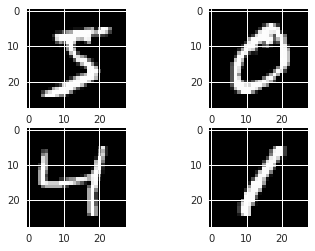

In [5]:
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [6]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [7]:
num_pixels = X_train.shape[1] * X_train.shape[2]
# reshape the inputs so that they can be passed to the vanilla NN
X_train = X_train.reshape(X_train.shape[0],num_pixels ).astype('float32')
X_test = X_test.reshape(X_test.shape[0],num_pixels).astype('float32')
# scale inputs
X_train = X_train / 255
X_test = X_test / 255

In [8]:
# one hot encode the output
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [9]:
# buildng the model
model = Sequential()
# add 1000 units in the hidden layer
# apply relu activation in hidden layer
model.add(Dense(1000, input_dim=num_pixels,activation='relu'))
# initialize the output layer
model.add(Dense(num_classes, activation='softmax'))
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# extract the summary of model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=1024, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 74us/step - loss: 0.4975 - acc: 0.8652 - val_loss: 0.2297 - val_acc: 0.9350